In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/029.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/014.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/150.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/109.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/149.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/033.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/049.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/048.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/153.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/143.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/115.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/131.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/062.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/067.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/106.jpg
/kaggle/input/knife-vs-pistol/Knife_vs_Pistol/Pistol/163.jpg
/kaggle/input/knife-vs-p

In [2]:
import tensorflow as tf
import os

In [3]:
train_dir = os.path.join('../input/cleaned/Knife_vs_Pistol/train')
val_dir = os.path.join('../input/cleaned/Knife_vs_Pistol/val')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing trainingset
train_datagen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'

)
training_set = train_datagen.flow_from_directory(
    
    train_dir,
    target_size = (64,64),
    batch_size = 4,
    class_mode = 'binary'
)

Found 412 images belonging to 2 classes.


In [5]:
#preprocessing testset

test_datagen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_set = test_datagen.flow_from_directory(
    
    val_dir,
    target_size = (64,64),
    batch_size = 4,
    class_mode = 'binary'
)

Found 25 images belonging to 2 classes.


In [6]:
import tensorflow as tf
#membuat model jarigan saraf tiruan
#model yg digunakan = sequential
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
#Adding 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
#STEP 3: FLATTENING
cnn.add(tf.keras.layers.Flatten())

In [10]:
#STEP 4: FULL CONNECTION
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [11]:
#STEP 5: OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
#compile model dengan 'adam'
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
#Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
103/103 [==============================] - 4s 36ms/step - loss: 0.5488 - accuracy: 0.7800 - val_loss: 0.6699 - val_accuracy: 0.4000
Epoch 2/25
103/103 [==============================] - 2s 21ms/step - loss: 0.4595 - accuracy: 0.8013 - val_loss: 0.7016 - val_accuracy: 0.6000
Epoch 3/25
103/103 [==============================] - 2s 21ms/step - loss: 0.3765 - accuracy: 0.8292 - val_loss: 0.9073 - val_accuracy: 0.5200
Epoch 4/25
103/103 [==============================] - 2s 21ms/step - loss: 0.3572 - accuracy: 0.8431 - val_loss: 1.3915 - val_accuracy: 0.4400
Epoch 5/25
103/103 [==============================] - 2s 21ms/step - loss: 0.3484 - accuracy: 0.8472 - val_loss: 1.3754 - val_accuracy: 0.4400
Epoch 6/25
103/103 [==============================] - 2s 20ms/step - loss: 0.2869 - accuracy: 0.8649 - val_loss: 0.7613 - val_accuracy: 0.6000
Epoch 7/25
103/103 [==============================] - 2s 19ms/step - loss: 0.3314 - accuracy: 0.8611 - val_loss: 0.5752 - val_accuracy: 0.7200

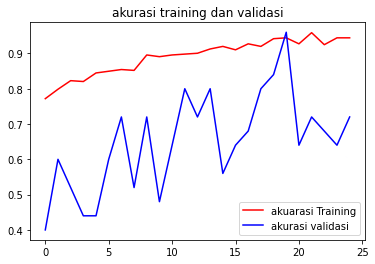

<Figure size 432x288 with 0 Axes>

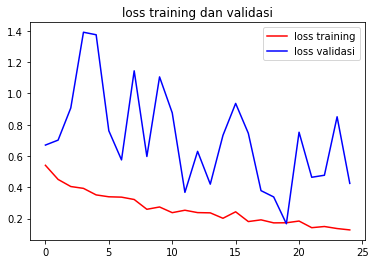

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'akuarasi Training')
plt.plot(epochs, val_acc,'b',label='akurasi validasi')
plt.title('akurasi training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'loss training')
plt.plot(epochs, val_loss,'b',label='loss validasi')
plt.title('loss training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

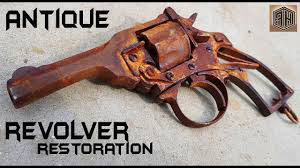

In [15]:
from keras.preprocessing import image
image.load_img('../input/cleaned/Knife_vs_Pistol/train/Pistol/014.jpg')

In [16]:
from keras.preprocessing import image
test_image = image.load_img('../input/cleaned/Knife_vs_Pistol/train/Pistol/014.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'gun'
else:
  prediction = 'knife'

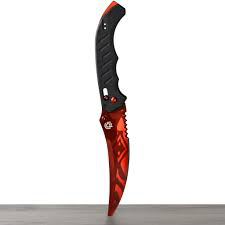

In [17]:
image.load_img('../input/cleaned/Knife_vs_Pistol/train/Knife/014.jpg')

In [18]:
print(prediction)

gun


In [19]:
test_image = image.load_img('../input/cleaned/Knife_vs_Pistol/train/Knife/014.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'gun'
else:
  prediction = 'knife'

In [20]:
print(prediction)

knife
